In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


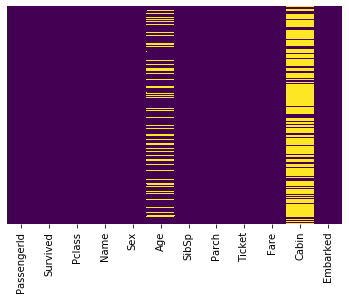

In [6]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

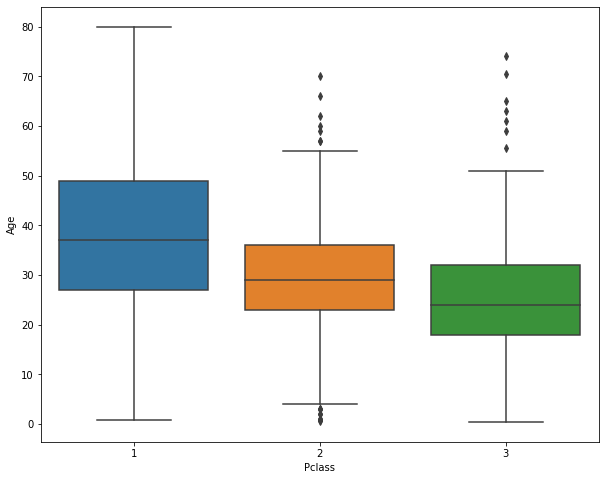

In [7]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

In [8]:
def impute_age(cols) :
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [9]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(impute_age, axis = 1)

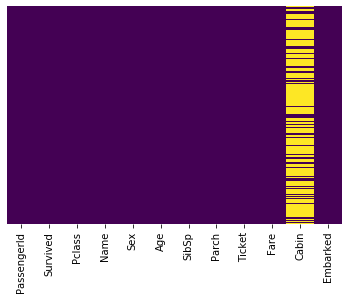

In [10]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [11]:
titanic.drop('Cabin', axis = 1, inplace = True)
titanic.dropna(inplace = True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


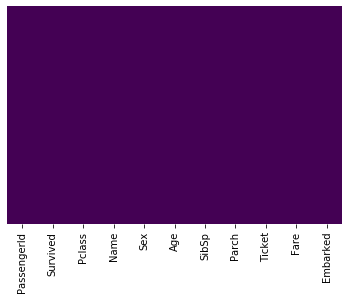

In [12]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [17]:
titanic = pd.concat([titanic,sex,embark], axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [18]:
titanic.drop(['Name','Sex','Ticket','Embarked'], axis = 1, inplace = True)

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [20]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lm = LogisticRegression(solver='liblinear')

In [22]:
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predictions = lm.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[151  12]
 [ 36  68]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [26]:
submit= pd.DataFrame()
submit['PassengerId'] = titanic['PassengerId']
submit['Survived'] = pd.Series(predictions)
submit.head()

,PassengerId,Survived
0,1,0.0
1,2,0.0
2,3,1.0
3,4,1.0
4,5,0.0


In [125]:
submit.to_csv('submission.csv', index = False)

In [29]:
df = pd.read_csv('test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [30]:
df.loc[152,'Fare']=35.6271

In [31]:
df['Fare'].mean()

35.62718827751193

In [32]:
df[df['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,35.6271,NaN,S


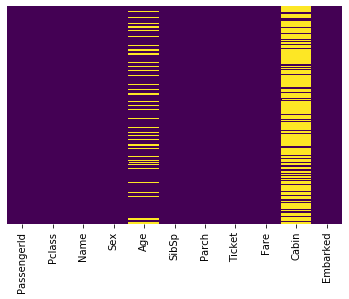

In [33]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

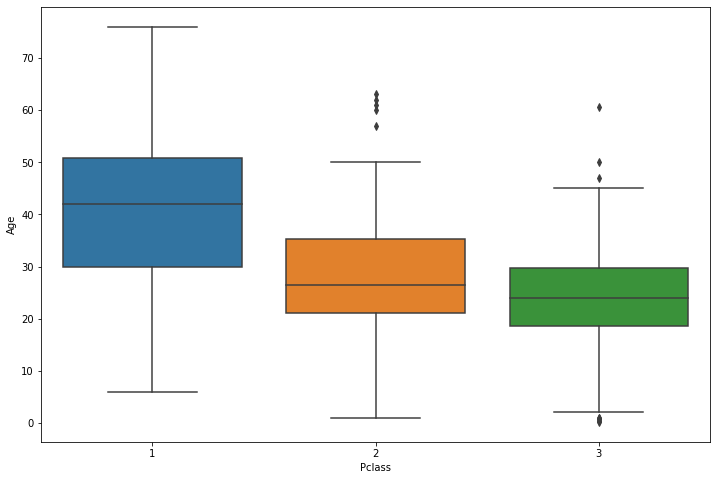

In [34]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

In [35]:
def impute_age(cols) :
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 42
        elif pclass == 2:
            return 36
        else:
            return 34
    else:
        return age

In [36]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

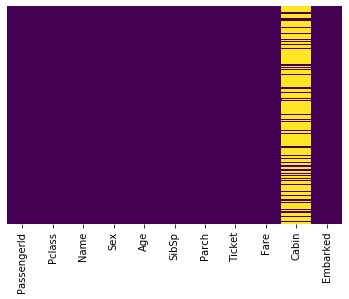

In [37]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [38]:
df.drop('Cabin', axis = 1, inplace = True)

In [39]:
df.dropna(inplace = True)

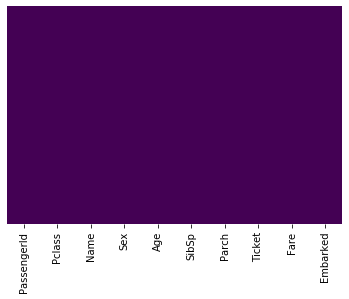

In [40]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [41]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [42]:
df[df['PassengerId']==1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,35.6271,S


In [43]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [44]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)
embark.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [45]:
df = pd.concat([df,sex,embark], axis = 1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1


In [46]:
df.drop(['Name', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace=True)

In [47]:
#sns.heatmap(df.isnull(), yticklabels=False, cbar =False, cmap = 'viridis')
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [48]:
df[df['PassengerId']==1044]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
152,1044,3,60.5,0,0,35.6271,1,0,1


In [67]:
#dff = df.iloc[:,:].values   
dff = df.to_numpy()

In [68]:
dff

array([[8.920e+02, 3.000e+00, 3.450e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [8.930e+02, 3.000e+00, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [8.940e+02, 2.000e+00, 6.200e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.307e+03, 3.000e+00, 3.850e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.308e+03, 3.000e+00, 3.400e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.309e+03, 3.000e+00, 3.400e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [77]:
pred= rfc.predict(dff)

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

ValueError: Found input variables with inconsistent numbers of samples: [267, 418]

In [53]:
submit= pd.DataFrame()
submit['PassengerId'] = df['PassengerId']
submit['Survived'] = pred
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [54]:
submit.to_csv('submit.csv', index = False)

In [55]:
submit.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [97]:
dff

array([[8.920e+02, 3.000e+00, 3.450e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [8.930e+02, 3.000e+00, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [8.940e+02, 2.000e+00, 6.200e+01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.307e+03, 3.000e+00, 3.850e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.308e+03, 3.000e+00, 3.400e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.309e+03, 3.000e+00, 3.400e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LinearRegression

In [73]:
#mod = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
#lm = LinearRegression()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
pred = rfc.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
print(confusion_matrix(y_test,pred))

[[149  14]
 [ 27  77]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88       163
           1       0.84      0.73      0.78       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267

